
![Semana Nacional de la Ingenieria Fisica](./DATA/Logo.png)
    
# Taller: Introducción a Deep Learning

<p>Comenzamos importando las librerías requeridas para nuestro trabajo.</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

<p>Los tipos de problema más comúnmente resueltos, haciendo uso de redes neuronales, son regresión y clasificación.<br>A continuación estudiamos las etapas principales del flujo de trabajo en Keras en tres ejemplos: una regresión y dos clasificaciones.</p>

## Modelo de regresión

En el siguiente caso de estudio trabajaremos con la base de datos de diagnóstico de tumores de cáncer de pecho (1995), del Wisconsin Diagnostic Breast Cancer (WDBC), elaborada por Dr. William H. Wolberg, W. Nick Street y lvi L. Mangasarian. Disponible en este [enlace](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

<p>Importamos la colección de datos en un DataFrame.</p>

In [ ]:
data = pd.read_csv("./DATA/wdbc.csv",sep=',',header=None)
#print(data)

<p>Desordenamos aleatoriamente los registros (shuffle).</p>

In [ ]:
data=data.sample(frac=1)
data=data.sample(frac=1)
#print(data)

En la siguiente imagen podemos revisar la estructura de la base de datos en uso.
![Descripcion_table](./Info_DF.png)
En este primer caso, la regresión la realizaremos para predecir el radio medio del tumor (target) a partir de los demás datos registrados del tumor (predictors). Dividimos la información entonces en dos estructuras de datos; y estas, a su vez, las dividimos en dos bloques: material de entrenamiento (training) y material de prueba (testing).

In [ ]:
predictors1=data.iloc[:,3:32]
target1=data.iloc[:,2]

p=round(0.75*predictors1.shape[0])

predictors1_train=np.asarray(predictors1[0:p])
target1_train=np.asarray(target1[0:p])
predictors1_test=np.asarray(predictors1[p:])
target1_test=np.asarray(target1[p:])

In [ ]:
print('Forma de arreglos\n')
print('Predictores de entrenamiento:',predictors1_train.shape)
print('Objetivos de entrenamiento:',target1_train.shape)
print('Predictores de prueba:',predictors1_test.shape)
print('Objetivos de entrenamiento:',target1_test.shape)
print('\n','Datos entrenamiento/Datos totales:',target1_train.shape[0]/(target1_test.shape[0]+target1_train.shape[0]))

### Definición de arquitectura de red neuronal
<p>Creamos el modelo (red neuronal) que entrenaremos.<br>
Será de tipo secuencial, y adicionaremos 9 capas ocultas (con cantidad de nodos variable) y una capa de salida (con un único nodo). La función de activación que usaremos es la función de activación lineal rectificadora (ReLU).<p/>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1=Sequential()
model1.add(Dense(500,activation='relu',input_shape=(29,)))
model1.add(Dense(500,activation='relu'))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(75,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(1))

### Compilación de red neuronal
<p>Establecemos atributos fundamentales de la red, los cuales determinan su funcionamiento y evaluación de desempeño: optimizador, función de pérdida e indicadores de desempeño a reportar.<p/>

In [ ]:
model1.compile(optimizer='adam',loss='mean_squared_error',metrics=[tf.keras.metrics.MeanSquaredError()])

<p>Generamos un resumen consolidado de la red neuronal construida. Podemos prever el tamaño del trabajo computacional a ejecutar revisando la cantidad de parámetros a ajustar durante el aprendizaje (pesos de ponderación o potenciación/depresión sináptica).<p/>

In [ ]:
model1.summary()

### Entrenamiento de red neuronal (aprendizaje)
Se entrena la red neuronal (se ajusta el modelo) suministrando los datos de entrenamiento con sus respectivos valores objetivo para la regresión. Además se configuran la cantidad de épocas y la porción de datos de validación para cada época.

In [ ]:
entrenamiento=model1.fit(predictors1_train,target1_train,validation_split=0.3,epochs=10)

print("\nValor promedio de 'radio':"+str(np.mean(target1_train)))

Podemos fácilmente graficar la evolución del desempeño de la red neuronal, durante el aprendizaje.

In [ ]:
plt.plot(entrenamiento.history['val_loss'])
plt.show()

### Validación de red neuronal
Revisamos el desempeño de la red neuronal al suministrar el conjunto de datos que la red 'no conoce': datos de prueba.

In [ ]:
mse=model1.evaluate(predictors1_test,target1_test)[0]
print(mse)
print(100*mse/np.mean(target1_train),'%')

## Modelo de clasificación
<p>Ahora emplearemos el mismo conjunto de datos, pero con otro enfoque. Ahora utilizaremos todos los datos registrados sobre los tumores, para predecir el diagnóstico: benigno (B) o maligno (M).<p/>

![Descripcion_table](./Info_DF.png)

### Preparación de los datos
Realizamos una preparación de los datos muy similarmente a como se hizo anteriormente, pero convertimos los resultados de los diagnósticos en booleanos (1/0).

In [ ]:
from tensorflow.keras.utils import to_categorical

predictors0=data.iloc[:,2:32]
target0=data[1]

target0.where(target0=='M',inplace=True,other=0)
target0.where(target0!='M',inplace=True,other=1)

target0=to_categorical(target0,num_classes=2)

p=round(0.75*predictors0.shape[0])

predictors0_train=np.asarray(predictors0[0:p])
target0_train=target0[0:p]
predictors0_test=np.asarray(predictors0[p:])
target0_test=target0[p:]

In [ ]:
print(predictors0_train.shape)
print(target0_train.shape)
print(predictors0_test.shape)
print(target0_test.shape)

### Definición de arquitectura de la red neuronal
Construimos una nueva red neuronal, también secuencial; pero en este caso incluimos la función de activación 'softmax' en la capa de salida, para conseguir resultados normalizados (interpretables como probabilidades).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model0=Sequential()
model0.add(Dense(100,activation='relu',input_shape=(30,)))
model0.add(Dense(50,activation='relu'))
model0.add(Dense(50,activation='relu'))
model0.add(Dense(5,activation='relu'))
model0.add(Dense(2,activation='softmax'))

### Compilación de la red neuronal
Compilamos nuestra red neuronal, pero en este caso empleamos nuevos indicadores de desempeño y función de pérdida, apropiados para la clasificación.

In [ ]:
model0.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model0.summary()

### Entrenamiento de la red neuronal (aprendizaje)

In [ ]:
entrenamiento=model0.fit(predictors0_train,target0_train,validation_split=0.3,epochs=10)

### Validación de la red neuronal

In [ ]:
model0.evaluate(predictors0_test,target0_test)

### Almacenamiento de resultados
Tras conseguir una red neuronal suficientemente entrenada (evitando el *overfitting*, claro), esta puede almacenarse como un archivo para su posterior uso. Los archivos de esta clase se almacenan con la extensión **.hdf5**. 

In [ ]:
from tensorflow.keras.models import load_model
ruta='./modelo_clasificador_diagnostico.hdf5'
model0.save(ruta)

Importamos la red neuronal almacenada como un nuevo modelo, y desplegamos el resumen verificando que se trate de la misma red previamente creada.

In [ ]:
modelo_importado=load_model(ruta)

modelo_importado.summary()

## Modelo de clasificación convolucional - Procesamiento de imágenes

### Introducción al manejo de imágenes en Python
Estudiaremos ahora un caso de clasificación de imágenes, haciendo uso de redes neuronales convolucionales.<br> La información de imágenes se almacenan como arreglos o matrices. Tras importar la imagen, extraer secciones, hacer modificaciones y operaciones con pixeles es un trabajo de manipulación de arreglos.
Las imágenes procesadas pueden tener varios canales de color (RGB), o solo uno (B&W).

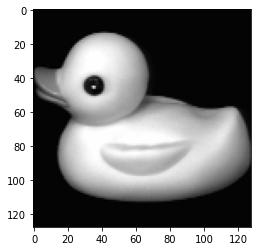

In [2]:
snif=plt.imread('./DATA/picture.png')
plt.imshow(snif)
plt.show()

im=plt.imread('./DATA/1/1_train/obj1__0.png')
plt.imshow(im, cmap='gist_gray')
plt.show()

In [3]:
im.shape

(128, 128)

Podemos, por ejemplo, conseguir que nuestro pato sea un pato más formal; con una sencilla alteración de la matriz.

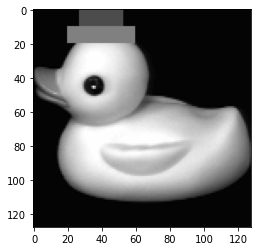

In [4]:
im[10:20,20:60]=0.5
im[0:10,27:53]=0.3
plt.imshow(im, cmap='gist_gray')
plt.show()

### Preparación de los datos
Las imágenes a utilizar tienen formato de 128px x 128px y solo tienen un canal de color (como mapas de intensidad). Son de cuatro tipos, como puede verificarse en las carpetas en DATA (/1 ,/2 ,/3 ,/4): *juguetes, carritos, bloques* y *recipientes*.<br>
Esta imágenes fueron tomadas de una base de datos provista por la Universidad de Columbia: [Columbia University Image Library
(COIL-20)](https://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php).<br>
Las importaremos, y le asociaremos a cada una un índice clasificador (0-3); incluyendo en las entradas de una lista parejas de arreglo de pixeles y su índice clasificador.<br>
Luego, desordenaremos de manera aleatoria la lista (preservando la relación de las imágenes con sus índices).

In [25]:
import random
a=[[[1, 2],3],[[4, 5],6],[[7, 8],9],[[0,0],0]]

print(a)
random.shuffle(a)
print(a)

[[[1, 2], 3], [[4, 5], 6], [[7, 8], 9], [[0, 0], 0]]
[[[7, 8], 9], [[1, 2], 3], [[4, 5], 6], [[0, 0], 0]]


In [26]:
from os import listdir
import random

data_train=[]
data_test=[]

for file in listdir('./DATA/1/1_train/'):
    image=plt.imread('./DATA/1/1_train/'+str(file))
    data_train.append([image,0])
for file in listdir('./DATA/2/2_train/'):
    image=plt.imread('./DATA/2/2_train/'+str(file))
    data_train.append([image,1])
for file in listdir('./DATA/3/3_train/'):
    image=plt.imread('./DATA/3/3_train/'+str(file))
    data_train.append([image,2])
for file in listdir('./DATA/4/4_train/'):
    image=plt.imread('./DATA/4/4_train/'+str(file))
    data_train.append([image,3])
    
for file in listdir('./DATA/1/1_test/'):
    image=plt.imread('./DATA/1/1_test/'+str(file))
    data_test.append([image,0])
for file in listdir('./DATA/2/2_test/'):
    image=plt.imread('./DATA/2/2_test/'+str(file))
    data_test.append([image,1])
for file in listdir('./DATA/3/3_test/'):
    image=plt.imread('./DATA/3/3_test/'+str(file))
    data_test.append([image,2])
for file in listdir('./DATA/4/4_test/'):
    image=plt.imread('./DATA/4/4_test/'+str(file))
    data_test.append([image,3])
    
random.shuffle(data_train)
random.shuffle(data_test)
random.shuffle(data_train)
random.shuffle(data_test)

data_train=np.array(data_train)
data_test=np.array(data_test)

In [27]:
print(data_train[0:9,1])

[2 2 3 2 3 3 2 1 0]


Separamos ahora en arreglos de datos diferentes las imágenes y los índices de entrenamiento y de prueba.

In [28]:
predictors_train=np.array([])
target_train=np.array([])
predictors_test=np.array([])
target_test=np.array([])

predictors_train=data_train[:,0]
target_train=data_train[:,1]

predictors_test=data_test[:,0]
target_test=data_test[:,1]

In [29]:
print(data_train.shape)
print(data_test.shape)
print()
print(predictors_train.shape)
print(predictors_test.shape)
print()
print(target_train.shape)
print(target_test.shape)

(698, 2)
(238, 2)

(698,)
(238,)

(698,)
(238,)


Podemos hacer una verificación rápida de que todo esté en orden, tras la manipulación de los datos.

1


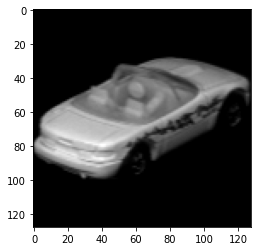

In [30]:
j=24

print(target_train[j])
plt.imshow(predictors_train[j],cmap='gist_gray')

Muy importante es hacer la adaptación de los índices clasificadores, asociados a cada imagen, al formato *one-hot encoding*.

In [31]:
from tensorflow.keras.utils import to_categorical
target_train_ohe=to_categorical(target_train,num_classes=4)
target_test_ohe=to_categorical(target_test,num_classes=4)
print('Antes:')
print(target_train[0:4])
print('Tras O-H E:')
print(target_train_ohe[0:4])
print()
print('Antes:')
print(target_test[0:4])
print('Tras O-H E:')
print(target_test_ohe[0:4])

Antes:
[2 2 3 2]
Tras O-H E:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

Antes:
[2 2 2 1]
Tras O-H E:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


Hacemos unas cuantas manipulaciones de las estructuras de datos (*casting*) para adecuarlas para su ingreso en las redes neuronales.

In [32]:
for i in range(0,predictors_train.shape[0]):
    predictors_train[i]=np.expand_dims(predictors_train[i],axis=2)
    
for i in range(0,predictors_test.shape[0]):
    predictors_test[i]=np.expand_dims(predictors_test[i],axis=2)

predictors_train=predictors_train.tolist()
predictors_test=predictors_test.tolist()
target_train_ohe=target_train_ohe.tolist()
target_test_ohe=target_test_ohe.tolist()
for i in range(0,len(target_train_ohe)):
    target_train_ohe[i]=np.array(target_train_ohe[i])
for i in range(0,len(target_test_ohe)):
    target_test_ohe[i]=np.array(target_test_ohe[i])

### Definición de arquitectura de la red neuronal convolucional (CNN)
Construimos una nueva red neuronal. En este caso empleamos capas densas, convolucionales, de *pooling* y de *reshaping*.<br>
Incluimos la configuración deseada para el kernel; esto se hace para cada capa. Volvemos a usar 'softmax', ya que es otro caso de clasificación.

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model=Sequential()
model.add(Conv2D(100,kernel_size=5,activation='relu',input_shape=(128,128,1),padding='same',strides=(1,1),dilation_rate=(3,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(60,kernel_size=5,activation='relu',padding='same',dilation_rate=(2,2)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(48,kernel_size=3,activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 100)     2600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 60)        150060    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 48)        25968     
_________________________________________________________________
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1

### Compilación de la red neuronal convolucional

In [35]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Entrenamiento de la red neuronal convolucional

In [36]:
entrenamiento_conv=model.fit(np.asarray(predictors_train),np.asarray(target_train_ohe),epochs=2)

Epoch 1/2
22/22 [==============================] - 207s 9s/step - loss: 0.6618 - accuracy: 0.7507
Epoch 2/2
22/22 [==============================] - 218s 10s/step - loss: 0.0801 - accuracy: 0.9742


### Validación de la red neuronal convolucional

In [37]:
model.evaluate(np.asarray(predictors_test),np.asarray(target_test_ohe))

8/8 [==============================] - 22s 3s/step - loss: 0.0196 - accuracy: 0.9916


[0.019600514322519302, 0.9915966391563416]

### Utilización del modelo para la generación de predicciones
Tomamos una selección de imágenes de las carpetas de revisión (test), las visualizamos, y las sometemos al análisis de la CNN.

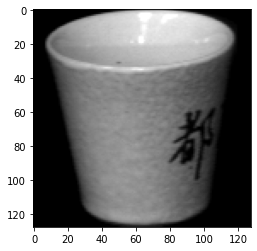

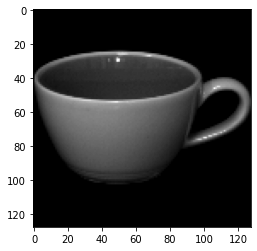

In [38]:
im0=plt.imread('./DATA/rev/'+str(listdir('./DATA/rev/')[0]))
plt.imshow(im0, cmap='gist_gray')
plt.show()
im1=plt.imread('./DATA/rev/'+str(listdir('./DATA/rev/')[1]))
plt.imshow(im1, cmap='gist_gray')
plt.show()
im2=plt.imread('./DATA/rev/'+str(listdir('./DATA/rev/')[2]))
plt.imshow(im2, cmap='gist_gray')
plt.show()
im3=plt.imread('./DATA/rev/'+str(listdir('./DATA/rev/')[3]))
plt.imshow(im3, cmap='gist_gray')
plt.show()
im4=plt.imread('./DATA/rev/'+str(listdir('./DATA/rev/')[4]))
plt.imshow(im4, cmap='gist_gray')
plt.show()
im5=plt.imread('./DATA/rev/'+str(listdir('./DATA/rev/')[5]))
plt.imshow(im5, cmap='gist_gray')
plt.show()

In [39]:
im0=np.expand_dims(im0,axis=2)
im0=np.expand_dims(im0,axis=0)
print((model.predict(im0)[0]).tolist().index(max((model.predict(im0)[0]).tolist())))

im1=np.expand_dims(im1,axis=2)
im1=np.expand_dims(im1,axis=0)
print((model.predict(im1)[0]).tolist().index(max((model.predict(im1)[0]).tolist())))

im2=np.expand_dims(im2,axis=2)
im2=np.expand_dims(im2,axis=0)
print((model.predict(im2)[0]).tolist().index(max((model.predict(im2)[0]).tolist())))

im3=np.expand_dims(im3,axis=2)
im3=np.expand_dims(im3,axis=0)
print((model.predict(im3)[0]).tolist().index(max((model.predict(im3)[0]).tolist())))

im4=np.expand_dims(im4,axis=2)
im4=np.expand_dims(im4,axis=0)
print((model.predict(im4)[0]).tolist().index(max((model.predict(im4)[0]).tolist())))

im5=np.expand_dims(im5,axis=2)
im5=np.expand_dims(im5,axis=0)
print((model.predict(im5)[0]).tolist().index(max((model.predict(im5)[0]).tolist())))

3
3
0
0
1
2
